In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
    "2Mu2E_100GeV_1p2GeV_9p6mm",
#    "2Mu2E_150GeV_1p2GeV_6p4mm",
#    "2Mu2E_200GeV_1p2GeV_4p8mm",
#    "2Mu2E_500GeV_1p2GeV_1p9mm",
#    "2Mu2E_800GeV_1p2GeV_1p2mm",
#    "2Mu2E_1000GeV_1p2GeV_0p96mm",
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["2mu2e"]
p = sidm_processor.SidmProcessor(
    channels,
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

KeyError: 'muon1_pt'

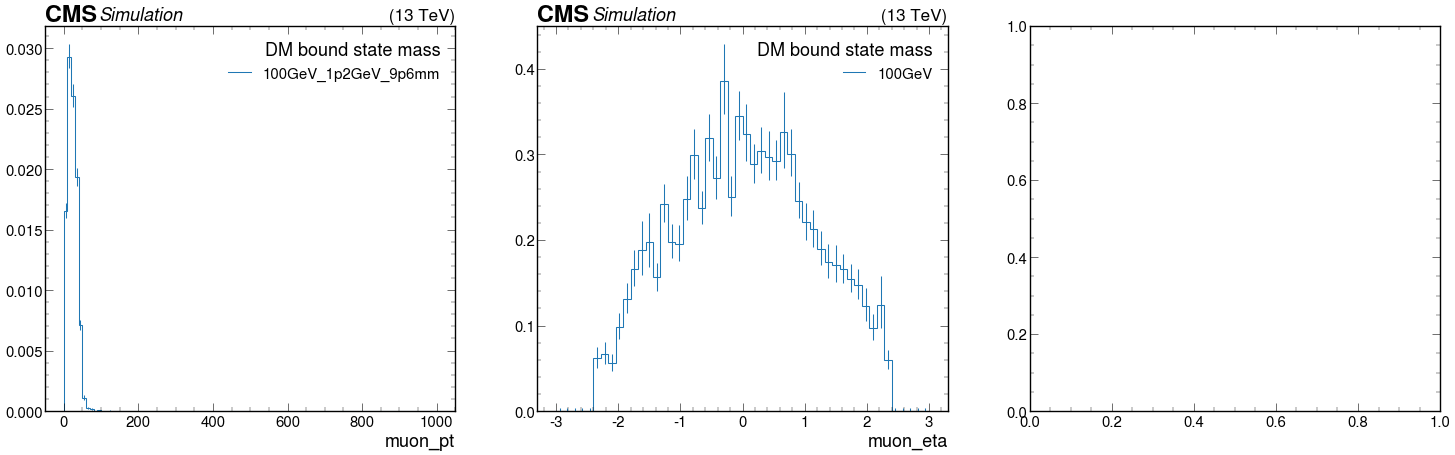

In [5]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["muon_pt"][channels[0], :1000j], density=True)
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["muon0_pt"][channels[0], :1000j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="right")

plt.subplot(1, nplots, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["muon1_pt"][channels[0], :1000j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="right")